In [1]:
from IPython.core.pylabtools import figsize
import matplotlib as mpl
import matplotlib.pyplot as plt
import scipy.stats
from scipy.stats import multivariate_normal
import numpy as np

from PIL import Image
from sklearn import datasets
from sklearn.mixture import GaussianMixture
from sklearn.model_selection import StratifiedKFold

%matplotlib inline

#### reading image

In [2]:
im = Image.open("./img_data/img10.jpg")
data = np.array(im)

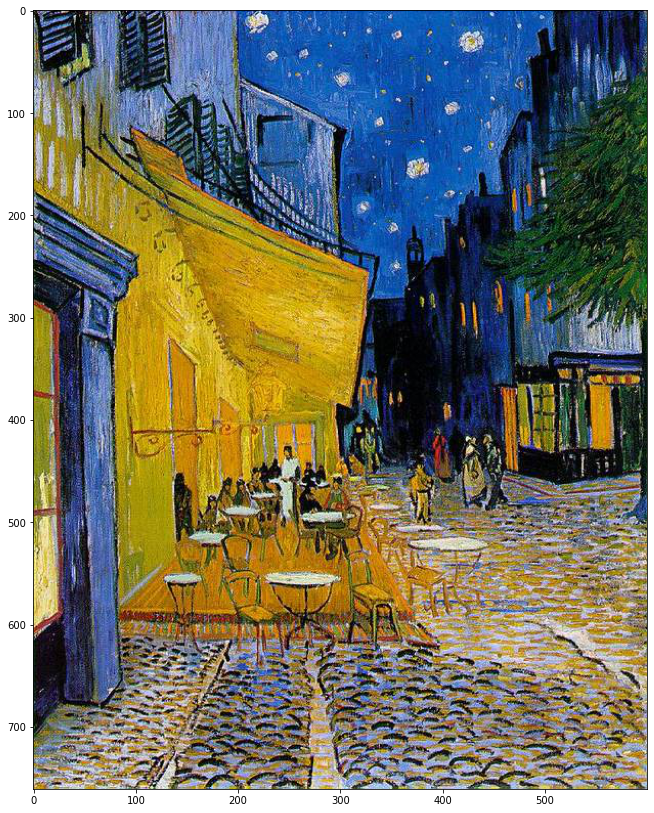

In [3]:
figsize(11, 30)
plt.imshow(data)
plt.show()

#### histogram by each channels

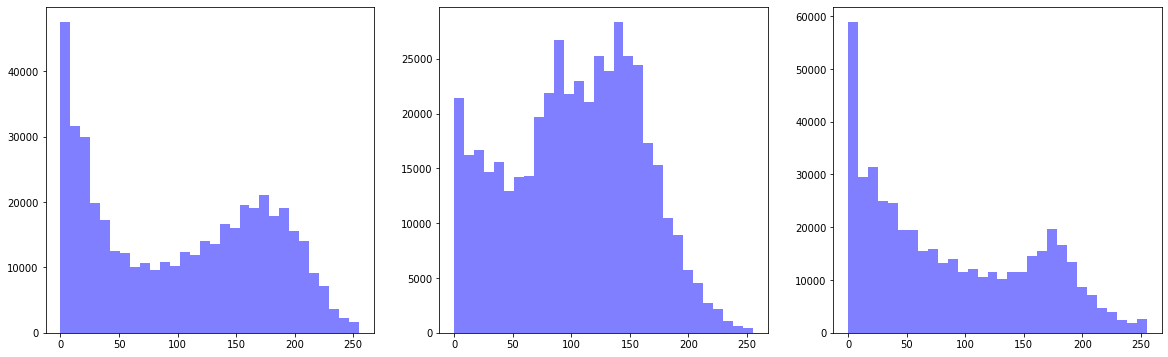

In [4]:
figsize(20, 6)
figure, plots = plt.subplots(ncols=3, nrows=1)

for i, subplot in zip(range(3), plots):
    temp = data[:,:,i].flatten()
    n, bins, patches = subplot.hist(temp, 30, facecolor='blue', alpha=0.5)
plt.show()

In [5]:
h, w, c = data.shape

# Training GMM model for Number of components N

#### prepare training data

In [6]:
X = np.array(im.getdata())
#(data.reshape(h*w, c)-X).shape
print(X.shape)

(456600, 3)


#### define number of component

In [7]:
N = 4

In [8]:
gmm = GaussianMixture(n_components=N)
gmm.fit(X)

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
                means_init=None, n_components=4, n_init=1, precisions_init=None,
                random_state=None, reg_covar=1e-06, tol=0.001, verbose=0,
                verbose_interval=10, warm_start=False, weights_init=None)

# Image analysis

#### visualize each group

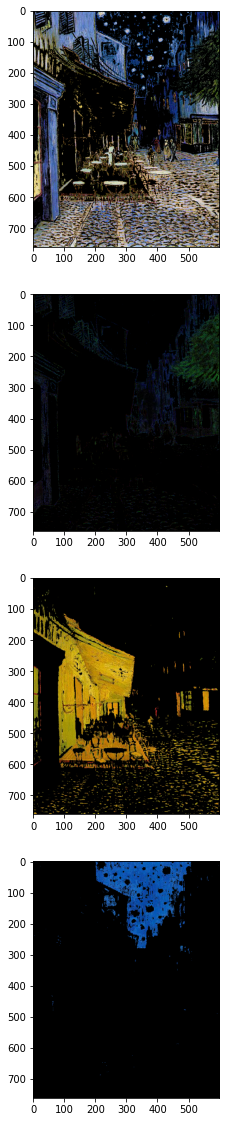

In [9]:
groups = gmm.predict(X)
figsize(20, 20)
figure, plots = plt.subplots(ncols=1, nrows=N)

for i, subplot in zip(range(N), plots):
    temp = (X * ((groups==i)*1).reshape(-1,1)).reshape((h, w, c))
    subplot.imshow(temp)
plt.show()

#### simulate random number from each group

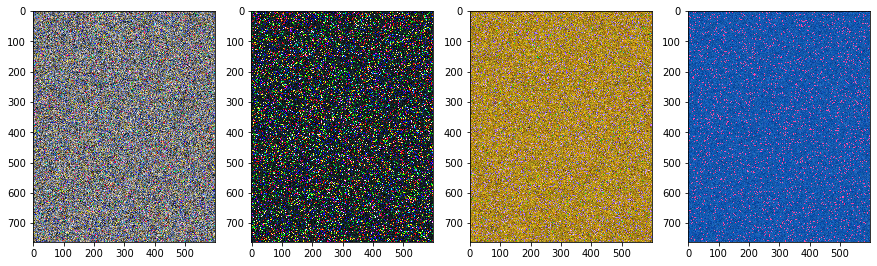

In [10]:
figsize(15, 20)
figure, plots = plt.subplots(ncols=N, nrows=1)

for i, subplot in zip(range(N), plots):
    temp = np.random.multivariate_normal(gmm.means_[i], gmm.covariances_[i], h*w).astype(dtype='uint8').reshape((h, w, c))
    #temp = multivariate_normal.rvs(gmm.means_[i], gmm.covariances_[i], h*w).astype(dtype='uint8').reshape((h, w, c))
    subplot.imshow(temp, interpolation='nearest')
plt.show()

#### simulate random number from gmm

In [11]:
fab_groups = np.random.choice(a=N, size=h*w, p=gmm.weights_)
fab_data = np.zeros((h, w, c))

for i in range(N):
    temp = ((fab_groups==i)*1).reshape((h, w, 1)) \
    * \
    np.random.multivariate_normal(gmm.means_[i], gmm.covariances_[i], h*w).reshape((h, w, c))
    fab_data += temp
fab_data = fab_data.astype(dtype='uint8')

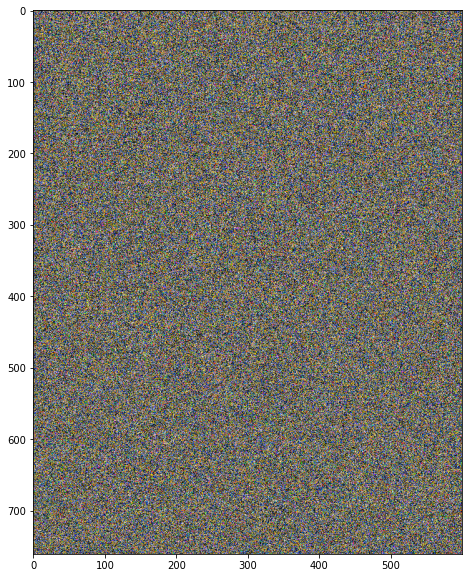

In [12]:
figsize(10, 10)
plt.imshow(fab_data)
plt.show()